# Project Stage III

### Import necessary dependencies

In [1]:
import pandas as pd
import plotly.express as px
from scipy import stats
from scipy.stats import poisson
import plotly.graph_objects as go
from IPython.display import Image

# Graphically plot the distribution and describe the distribution statistics

### North Carolina distribution

In [2]:
cases = pd.read_csv('../../Team/covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [3]:
nc_cases = cases[cases["State"] == "NC"]
selected_date_columns = [col for col in nc_cases.columns if '2020-07-01' <= col <= '2020-12-31']
nc_cases = nc_cases[selected_date_columns]
nc_cases.head()

,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1923,3,3,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,1,38,82
1924,1151,1179,1207,1240,1274,1292,1309,1319,1357,1388,...,9509,9509,9509,9509,9509,9509,10120,10164,10274,10397
1925,93,101,105,112,118,124,134,138,140,149,...,2367,2367,2367,2367,2367,2367,2526,2564,2642,2662
1926,32,36,36,36,37,37,37,37,39,41,...,558,558,558,558,558,558,611,619,633,638
1927,132,138,142,148,149,155,162,171,176,182,...,1284,1284,1284,1284,1284,1284,1380,1383,1402,1407


In [4]:
# July 1, 2020 is a Wednesday
count = 6
weekly_cases_nc = [] # where Wednesday from each week is chosen
for col in nc_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_nc.append(nc_cases[col].sum())
weekly_cases_nc_data = pd.Series(weekly_cases_nc)

### Graphically plot the distribution and describe the distribution statistics

<Axes: >

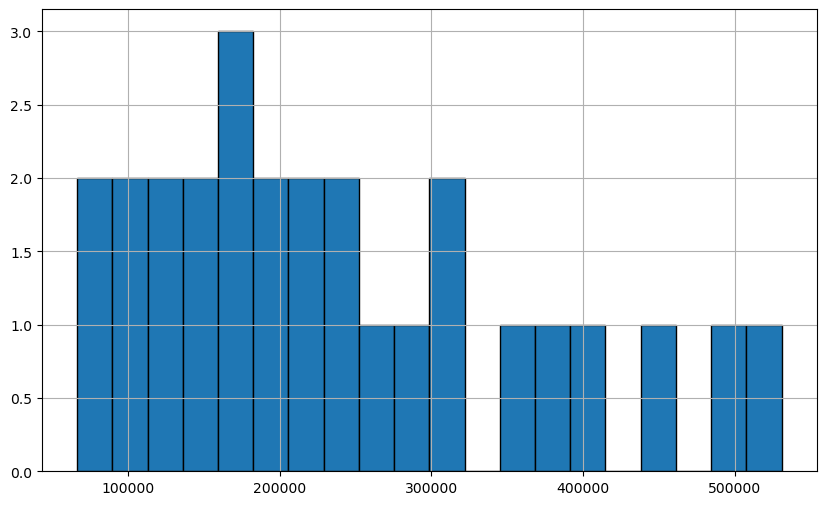

In [5]:
weekly_cases_nc_data.hist(bins=20, ec='black', figsize=(10, 6))

### Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis)

In [6]:
mean = weekly_cases_nc_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_nc_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_nc_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_nc_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_nc_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Bimodal distribution")

The Mean is: 239380.59
The Median is: 210629.00
The Variance is: 16396212258.33
The Skew is: 0.7593
The Kurtosis is: -0.2102

 We have a Bimodal distribution


## Compare the North Carolina distribution and its statistics to 5 other states

### New York distribution

<Axes: >

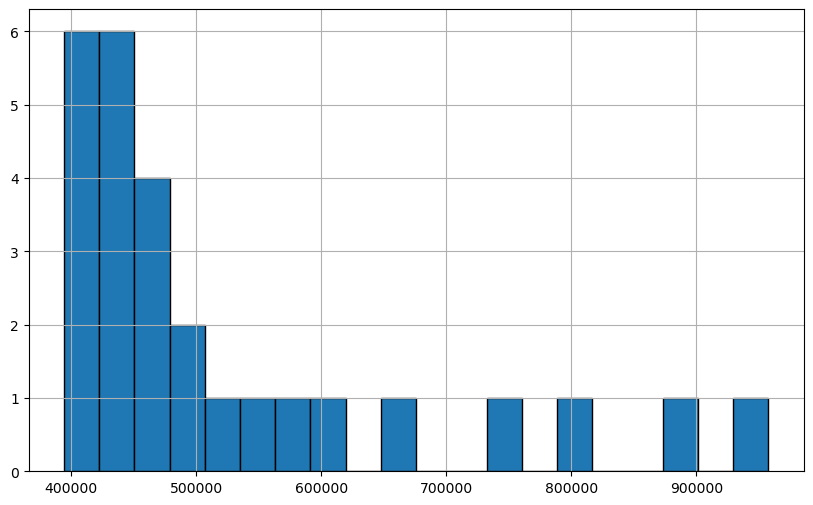

In [7]:
ny_cases = cases[cases["State"] == "NY"]
selected_date_columns = [col for col in ny_cases.columns if '2020-07-01' <= col <= '2020-12-31']
ny_cases = ny_cases[selected_date_columns]

count = 6
weekly_cases_ny = []
for col in ny_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ny.append(ny_cases[col].sum())
weekly_cases_ny_data = pd.Series(weekly_cases_ny)

weekly_cases_ny_data.hist(bins=20, ec='black', figsize=(10, 6))

In [8]:
mean = weekly_cases_ny_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_ny_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_ny_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_ny_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_ny_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Skewed right distribution")

The Mean is: 524891.04
The Median is: 458718.00
The Variance is: 23675112441.58
The Skew is: 1.6414
The Kurtosis is: 1.8822

 We have a Skewed right distribution


### New Jersey distribution

<Axes: >

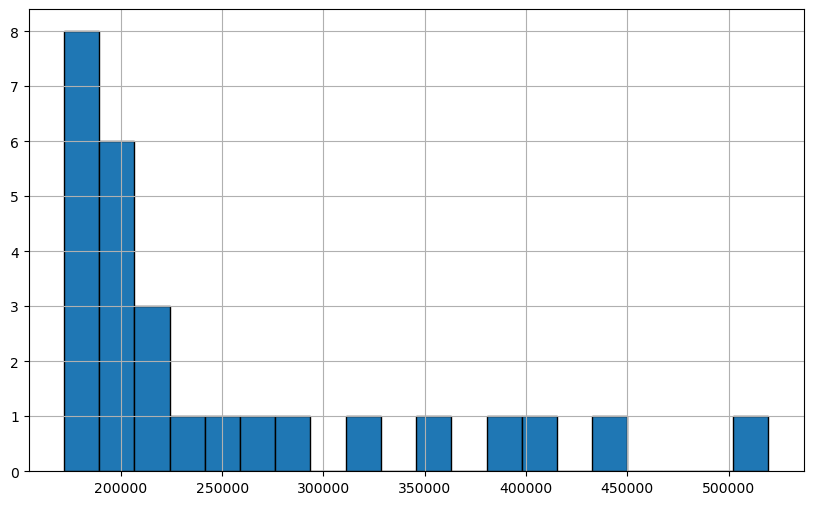

In [9]:
nj_cases = cases[cases["State"] == "NJ"]
selected_date_columns = [col for col in nj_cases.columns if '2020-07-01' <= col <= '2020-12-31']
nj_cases = nj_cases[selected_date_columns]

count = 6
weekly_cases_nj = []
for col in nj_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_nj.append(nj_cases[col].sum())
weekly_cases_nj_data = pd.Series(weekly_cases_nj)

weekly_cases_nj_data.hist(bins=20, ec='black', figsize=(10, 6))

In [10]:
mean = weekly_cases_nj_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_nj_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_nj_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_nj_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_nj_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Skewed right distribution")

The Mean is: 249087.11
The Median is: 205274.00
The Variance is: 8903494118.49
The Skew is: 1.5736
The Kurtosis is: 1.6678

 We have a Skewed right distribution


### California distribution

<Axes: >

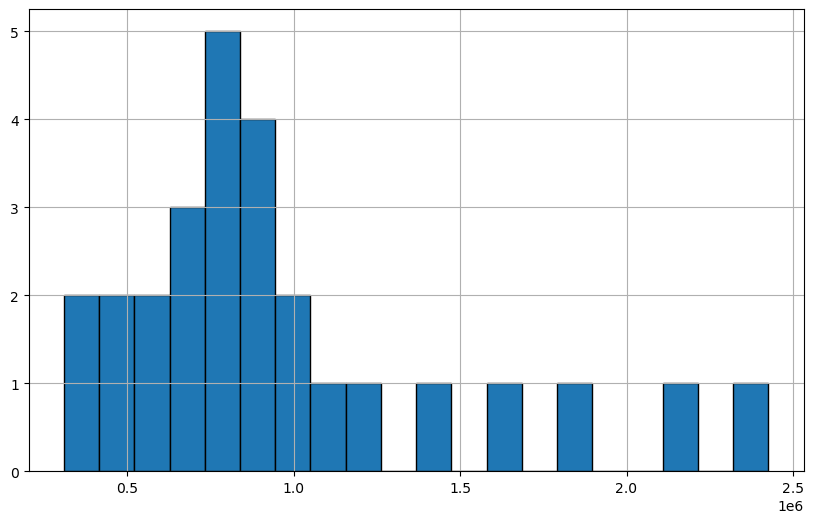

In [11]:
ca_cases = cases[cases["State"] == "CA"]
selected_date_columns = [col for col in ca_cases.columns if '2020-07-01' <= col <= '2020-12-31']
ca_cases = ca_cases[selected_date_columns]

count = 6
weekly_cases_ca = []
for col in ca_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ca.append(ca_cases[col].sum())
weekly_cases_ca_data = pd.Series(weekly_cases_ca)

weekly_cases_ca_data.hist(bins=20, ec='black', figsize=(10, 6))

In [12]:
mean = weekly_cases_ca_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_ca_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_ca_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_ca_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_ca_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Skewed right distribution")

The Mean is: 973949.44
The Median is: 834789.00
The Variance is: 271986757653.56
The Skew is: 1.4319
The Kurtosis is: 1.7708

 We have a Skewed right distribution


### Texas distribution

<Axes: >

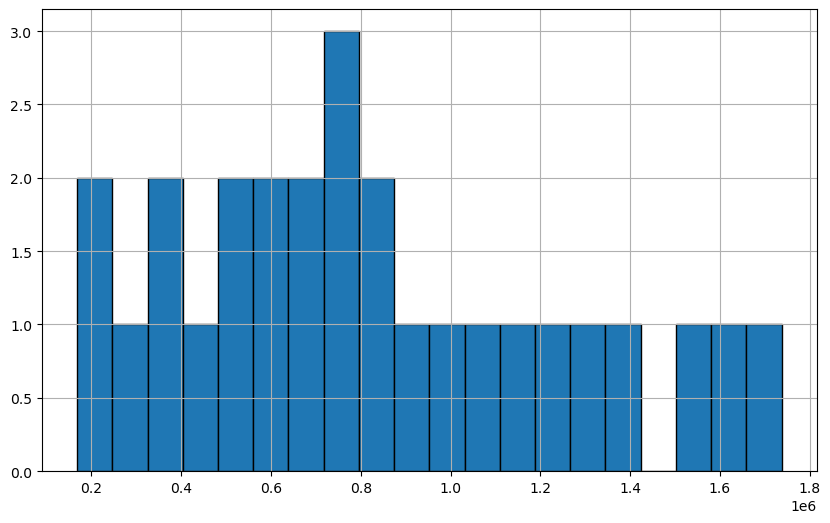

In [13]:
tx_cases = cases[cases["State"] == "TX"]
selected_date_columns = [col for col in tx_cases.columns if '2020-07-01' <= col <= '2020-12-31']
tx_cases = tx_cases[selected_date_columns]

count = 6
weekly_cases_tx = []
for col in tx_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_tx.append(tx_cases[col].sum())
weekly_cases_tx_data = pd.Series(weekly_cases_tx)

weekly_cases_tx_data.hist(bins=20, ec='black', figsize=(10, 6))

In [14]:
mean = weekly_cases_tx_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_tx_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_tx_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_tx_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_tx_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Multimodal distribution")

The Mean is: 826769.81
The Median is: 748967.00
The Variance is: 188294610387.85
The Skew is: 0.5457
The Kurtosis is: -0.5038

 We have a Multimodal distribution


### Florida distribution

<Axes: >

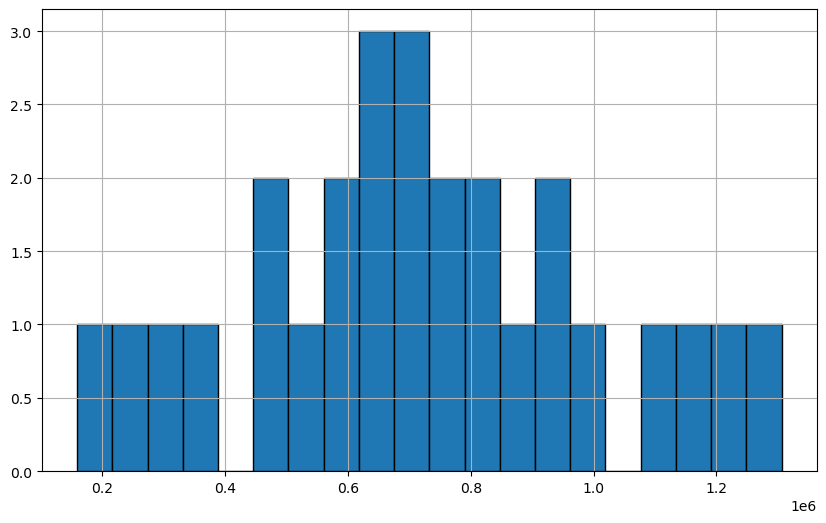

In [15]:
fl_cases = cases[cases["State"] == "FL"]
selected_date_columns = [col for col in fl_cases.columns if '2020-07-01' <= col <= '2020-12-31']
fl_cases = fl_cases[selected_date_columns]

count = 6
weekly_cases_fl = []
for col in fl_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_fl.append(fl_cases[col].sum())
weekly_cases_fl_data = pd.Series(weekly_cases_fl)

weekly_cases_fl_data.hist(bins=20, ec='black', figsize=(10, 6))

In [16]:
mean = weekly_cases_fl_data.mean()
print(f"The Mean is: {mean:.2f}")

median = weekly_cases_fl_data.median()
print(f"The Median is: {median:.2f}")

variance = weekly_cases_fl_data.var()
print(f"The Variance is: {variance:.2f}")

skew = weekly_cases_fl_data.skew()
print(f"The Skew is: {skew:.4f}")

kurtosis = weekly_cases_fl_data.kurt()
print(f"The Kurtosis is: {kurtosis:.4f}")

print("\n We have a Symmetrical distribution")

The Mean is: 721351.74
The Median is: 706515.00
The Variance is: 84378499800.05
The Skew is: 0.1006
The Kurtosis is: -0.2044

 We have a Symmetrical distribution


__Analysis__: The distributions look different for all States, and this implies that each State experinced a different pattern in the rise of COVID-19 cases.

## Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states

# ?????????????????????????????????????????????????????????????????

## Perform corelation between Employment data and COVID-19 cases to observe patterns for North Carolina

In [17]:
employment_jul_aug_sep = pd.read_excel('allhlcn203.xlsx')
nc_employment_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["St Name"] == "North Carolina"]
nc_employment_jul_aug_sep = nc_employment_jul_aug_sep[["July Employment", "August Employment", "September Employment"]]

employment_oct_nov_dec = pd.read_excel('allhlcn204.xlsx')
nc_employment_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["St Name"] == "North Carolina"]
nc_employment_oct_nov_dec = nc_employment_oct_nov_dec[["October Employment", "November Employment", "December Employment"]]

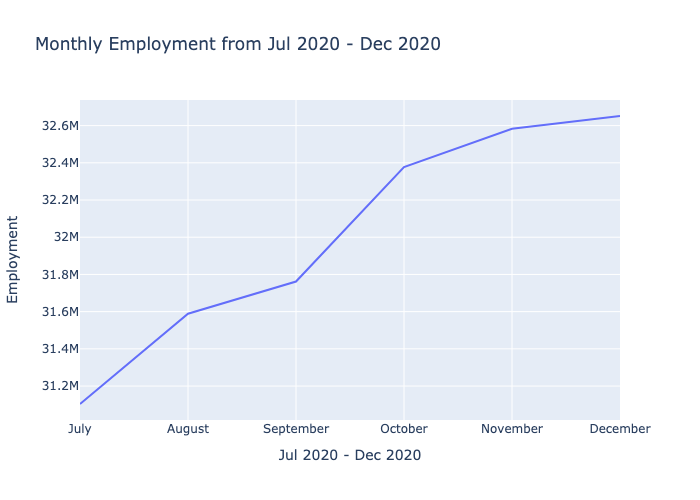

In [18]:
nc_employment_jul = nc_employment_jul_aug_sep["July Employment"].sum()
nc_employment_aug = nc_employment_jul_aug_sep["August Employment"].sum()
nc_employment_sep = nc_employment_jul_aug_sep["September Employment"].sum()

nc_employment_oct = nc_employment_oct_nov_dec["October Employment"].sum()
nc_employment_nov = nc_employment_oct_nov_dec["November Employment"].sum()
nc_employment_dec = nc_employment_oct_nov_dec["December Employment"].sum()

months = ["July", "August", "September", "October", "November", "December"]
employment_sums = [nc_employment_jul, nc_employment_aug, nc_employment_sep, nc_employment_oct, nc_employment_nov, nc_employment_dec]

data = {
    'Jul 2020 - Dec 2020': months,
    'Employment': employment_sums
}

fig = px.line(data, x='Jul 2020 - Dec 2020', y='Employment', title='Monthly Employment from Jul 2020 - Dec 2020')
fig.write_image("employment.png")
Image(filename="employment.png")

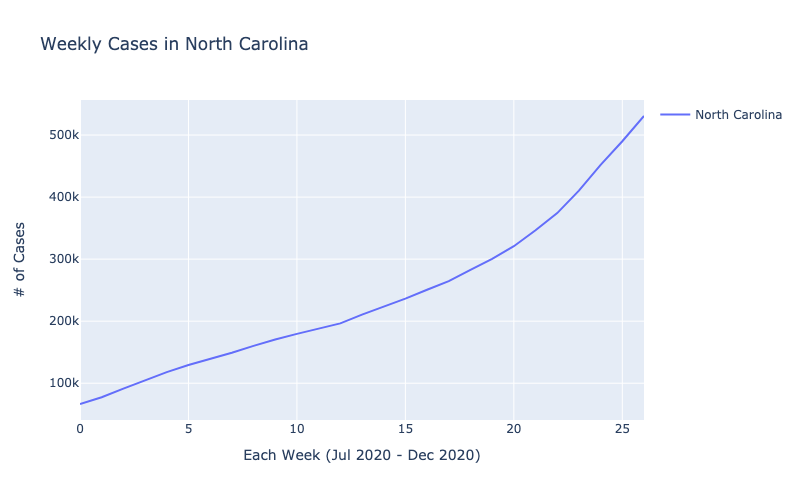

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_cases_nc_data.index, y=weekly_cases_nc_data,
                         mode='lines', name='North Carolina'))

fig.update_layout(
    title='Weekly Cases in North Carolina',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("nc_cases.png")
Image(filename="nc_cases.png")

### Corelation and Pattern?

__Observation__: We would assume that as COVID-19 cases were on the rise, there would be a drastic fall in employment, but our graph shows the opposite. From further research, it seems that COVID-19 lockdowns ended in August 2020 and ever since then the recovery of our economy began (National Institues of Health(.gov)). Considering these facts, our graphs are accurate since they show data from July 2020 to December 2020. a period when the economy was in the recovery phase.

## End of Lockdowns lead to higher COVID-19 cases

Begining August 2020, mostly all lockdowns were lifted and this let to more and more people being uncautious once gain leading to a surge in spread COVID-19.

## High Employment lead to higher COVID-19 cases

As the economy was in recovery the employment soared, and more and more cases of COVID-19 were on the rise. From the graphs displayed above, we observe that as the Employement went higher and higher, the number of COVID-19 cases rose more and more.

## Holiday gatherings lead to higher COVID-19 cases

The Months examined were from July to December, and all these months of High gatherings (i.e., 4th of July, Halloween, Thanksgiving, Christmas). The high gatherings and people being around eachother without caution lead to a spread of COVID-19 as suuported by our graphs.